In [140]:
import pandas as pd
from sklearn import preprocessing
df = pd.read_csv('../data/raw_postpro.csv')
df1 = df[["청구품목", 'key2', 'leadtime', '견적화폐' , '발주처']]
df1["leadtime"] = df["leadtime"].astype(int)

C:\Users\SW\AppData\Local\Temp\ipykernel_17936\1378052945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["leadtime"] = df["leadtime"].astype(int)


In [141]:
df.columns

Index(['청구서번호', 'No.', 'Subject', 'Machinery', 'Assembly', '청구품목', 'Part No.1',
       'Part No.2', 'key1', 'key2', '리드타임_음수제거', '청구량', '견적', '견적수량', '견적화폐',
       '견적단가', '발주번호', '발주처', '발주', '발주수량', '발주금액', 'D/T', '미입고 기간', '리드타임',
       '창고입고', '창고입고수량', 'Control No.', '입고창고', '창고출고', '창고출고수량', '출고선박',
       '출고운반선', '선박입고', '선박입고수량', '완료 여부', 'leadtime'],
      dtype='object')

In [142]:
# df["리드타임"] = df["리드타임"].astype(float)
# df["key2"] = df["key2"].astype(int)
df1["leadtime"].iloc[:50,]

0     194
1      59
2      61
3     212
4     220
5      80
6     100
7      13
8     117
9      96
10      2
11    156
12     72
13     25
14     49
15     49
16     49
17     49
18     56
19     48
20     56
21     56
22     28
23      6
24     56
25     48
26     56
27     48
28      6
29      6
30     32
31      6
32      6
33      6
34      6
35      6
36      6
37      6
38      6
39      6
40      6
41      6
42      6
43      6
44      6
45      6
46      6
47      6
48     62
49     62
Name: leadtime, dtype: int32

In [143]:
df

,청구서번호,No.,Subject,Machinery,Assembly,청구품목,Part No.1,Part No.2,key1,key2,...,Control No.,입고창고,창고출고,창고출고수량,출고선박,출고운반선,선박입고,선박입고수량,완료 여부,leadtime
0,ELS-BS-ESP-2004002,12,NO.1 A/E C18 MAJOR O/H PARTS,NO.1 GENERATOR ENGINE,323-6480 LINES GP-FUEL,SEAL-O-RING-STOR,7.00E-275,0,7.00E-275,COOLER,...,혜인 발주,BS,2020-09-19,1,BLO,본선 선적,0,0,0,194
1,OCA-BS-ESP-2010004,5,운전시간 대비 #2 AUX ENG TOP END O/H PARTS,NO.2 GENERATOR ENGINE,GASKET KIT,OIL COOLER & LINES,7.00E-275,0,7.00E-275,COOLER,...,혜인 발주,BS,2020-09-18,1,JBG,본선 선적,0,0,0,59
2,MIR-BS-ESP-2011002,119,운전시간 대비 #2 AUX ENG(CAT 3512C) MAJOR O/H PARTS,NO.2 GENERATOR ENGINE,285-8374 MANIFOLD GP-EXH,WASHER,7.00E-275,0,7.00E-275,COOLER,...,0,BS,2020-12-12,1,BON,SANWA FONTAINE,0,0,0,61
3,BLO-BS-ESP-2003002,16,#1 AUX ENG TOP END O/H PARTS,NO.1 GENERATOR ENGINE,159-8828 TURBO GP,BOLT-HIGH TEMP,7.00E-275,0,7.00E-275,COOLER,...,혜인 발주,BS,2021-06-16,1,MIR,체항수리 시 사용,0,0,0,212
4,DEO-BS-ESP-2105008,97,DEO-E-210512-01,NO.1 GENERATOR ENGINE,2N4727 INSTRUMNT PANEL GP,SEAL,7.00E-275,0,7.00E-275,COOLER,...,0,BS,0,0,0,0,0,0,0,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20512,BLO-BS-ESP-2006006,1,"BLO-F-ENGINE-200515-03 BOAT DAVIT CYL 외, AIRCO...",HYD. SYSTEM,5-753-2E_BOAT DAVIT & N.D CRANE LINE,HYD. CYLINDER_NET BOAT DAVIT,φ150 × φ85 × 695st,FF-SE-1CB150BB695ABD-YP2J,φ150 × φ85 × 695stFF-SE-1CB150BB695ABD-YP2J,CYLINDER,...,20-09-161,BW,0,0,0,0,0,0,0,95
20513,BLO-BS-ESP-2004008,1,BLO-F-ENGINE-200403-01 (NAVI DECK CRANE DERRIN...,HYD. SYSTEM,5-753-2E_BOAT DAVIT & N.D CRANE LINE,HYD. CYLINDER_N.D CRANE_BOOM_LIFTER,φ160 × φ112 × 1130st,S-2CA160A20.6N1130-1,φ160 × φ112 × 1130stS-2CA160A20.6N1130-1,CYLINDER,...,20-07-114,BW,2020-08-26,1,BLO,BLO 상가시 선적,0,0,0,67
20514,ELS-BS-ESP-1908002,2,ELS-F-ENG-190628-02,6M NET BOAT,ELECTRIC CLUTCH,PULLY,Φ305X5V-3,0,Φ305X5V-3,BELT,...,19-08-164,BW,2019-09-04,1,ELS,ONENESS,2019-10-02,1,완료,25
20515,BLO-BS-ESP-1906014,2,BLO-F-ENGINE-190617-01 (NET BOAT PARTS),7M NET BOAT,HAND HYDRAULIC STEERING SYSTEM,CYLINDER,Φ50 x S195 CYLINDER,0,Φ50 x S195 CYLINDER,CYLINDER,...,19-07-134,BW,2019-08-20,1,BLO,세이셀 컨테이너,2019-10-12,1,완료,25


In [144]:
# # 컬럼 값을 배열로 변환
# leadtime_val = df1['leadtime'].values

# # 로그 변환 전에 1을 더함
# leadtime_val = np.log(leadtime_val + 1)

# # 컬럼 추가
# df1['leadtime+1'] = leadtime_val
# # df1

In [145]:
lead = df1['leadtime']
mean = np.mean(lead)

# 분산 계산
variance = np.var(lead)

# 결과 출력
print("평균:", mean)
print("분산:", variance)

평균: 75.87961202904908
분산: 4859.405207472425


## X 값 CountVectorizer로 벡터화

In [146]:
from gensim.models import FastText
from sklearn.feature_extraction.text import CountVectorizer
columns = ["청구품목", 'key2', '견적화폐' , '발주처']
embedings = []
for col in columns:
    documents = df1[col].tolist()

    # FastText 모델 학습
    model = FastText(sentences=[doc.split() for doc in documents], vector_size=100, window=5, min_count=1, sg=1)

    # 벡터화된 데이터 초기화
    vectors = []

    # 각 문서에 대해 벡터 생성
    for doc in documents:
        vector = np.zeros(model.vector_size)
        count = 0
        for word in doc.split():
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count > 0:
            vector /= count
        vectors.append(vector)

    # 벡터화된 데이터를 배열로 변환
    vectors = np.array(vectors)
    embedings.append(vectors)
embedings

[array([[ 0.24561308,  0.08143352, -0.00749094, ...,  0.1339568 ,
          0.085678  ,  0.03183369],
        [ 0.30951426,  0.06792523,  0.09558626, ..., -0.02540344,
          0.02752966,  0.17935069],
        [ 0.43840909,  0.14884613, -0.04903835, ...,  0.2755408 ,
          0.08482964,  0.00607371],
        ...,
        [ 0.0584606 ,  0.00662806, -0.01963246, ...,  0.01313843,
          0.01846877,  0.03716356],
        [ 0.26082209,  0.09299044, -0.09573925, ..., -0.05502998,
          0.11930552,  0.27220321],
        [ 0.25313027,  0.04534752, -0.00841505, ..., -0.02838663,
          0.10223701,  0.24509363]]),
 array([[ 0.00110732, -0.00138417, -0.00077254, ..., -0.00037237,
         -0.00151356,  0.00138174],
        [ 0.00110732, -0.00138417, -0.00077254, ..., -0.00037237,
         -0.00151356,  0.00138174],
        [ 0.00110732, -0.00138417, -0.00077254, ..., -0.00037237,
         -0.00151356,  0.00138174],
        ...,
        [ 0.00114423,  0.00317362,  0.00134651, ...,  

In [147]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 각 컬럼을 임베딩하여 벡터로 표현
embeddings_col1 = embedings[0]
embeddings_col2 = embedings[1]
embeddings_col3 = embedings[2]
embeddings_col4 = embedings[3]

# 예측 대상 데이터
target_data = df1['leadtime'].values

# 피처 벡터 생성
X = np.concatenate([embeddings_col1, embeddings_col2, embeddings_col3, embeddings_col4], axis=1)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, target_data, test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [148]:
X.shape, y.shape
# X
# y

((20517, 400), (20517,))

## 결과확인
### 오차가 너무 많이 나고 예측 값에 음수가 들어감

In [149]:
# 테스트 데이터에 대한 예측
predictions = model.predict(X_test)

# 예측값과 실제값 비교
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
# print(comparison)
comparison[:30]

,Actual,Predicted
0,145,91.170395
1,78,92.824631
2,56,101.960373
3,108,98.040024
4,220,110.350021
5,43,85.090805
6,100,52.396896
7,156,89.984787
8,10,75.594162
9,11,6.762131


In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, fbeta_score, r2_score

# R 제곱 계산
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

## R 제곱 값이 음수인 경우는 모델이 주어진 데이터를 설명하지 못하는 경우를 의미
## => 모델이 이상함

# 평균 제곱 오차 계산
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# 평균 절대 오차 계산
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

R-squared: -4572417129757991.0
Mean Squared Error: 2.1962026330998858e+19
Mean Absolute Error: 139269603.3341745


## lstm
### 속도가 너무 느리고 정확도가 너무 낮음

In [209]:
from gensim.models import FastText
from sklearn.feature_extraction.text import CountVectorizer
columns = ["청구품목", 'key2', '견적화폐' , '발주처']
embedings = []
for col in columns:
    documents = df1[col].tolist()

    # FastText 모델 학습
    model = FastText(sentences=[doc.split() for doc in documents], vector_size=100, window=5, min_count=1, sg=1)

    # 벡터화된 데이터 초기화
    vectors = []

    # 각 문서에 대해 벡터 생성
    for doc in documents:
        vector = np.zeros(model.vector_size)
        count = 0
        for word in doc.split():
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count > 0:
            vector /= count
        vectors.append(vector)

    # 벡터화된 데이터를 배열로 변환
    vectors = np.array(vectors)
    embedings.append(vectors)


In [210]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 각 컬럼을 임베딩하여 벡터로 표현
embeddings_col1 = embedings[0]
embeddings_col2 = embedings[1]
embeddings_col3 = embedings[2]
embeddings_col4 = embedings[3]

# 예측 대상 데이터
target_data = df1['leadtime'].values

# 피처 벡터 생성
X = np.concatenate([embeddings_col1, embeddings_col2, embeddings_col3, embeddings_col4], axis=1)

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, target_data, test_size=0.2, random_state=42)

# 입력 데이터를 3차원으로 변환
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape=(400,1)))
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 모델 예측
predictions = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

Epoch 1/10
513/513 [==============================] - 13s 23ms/step - loss: 6374.5952
Epoch 2/10
513/513 [==============================] - 12s 24ms/step - loss: 4924.6387
Epoch 3/10
513/513 [==============================] - 12s 23ms/step - loss: 4874.3462
Epoch 4/10
513/513 [==============================] - 12s 24ms/step - loss: 4874.1641
Epoch 5/10
513/513 [==============================] - 12s 23ms/step - loss: 4874.0771
Epoch 6/10
513/513 [==============================] - 12s 23ms/step - loss: 4874.4424
Epoch 7/10
513/513 [==============================] - 12s 23ms/step - loss: 4874.7085
Epoch 8/10
513/513 [==============================] - 12s 23ms/step - loss: 4874.3340
Epoch 9/10
513/513 [==============================] - 12s 23ms/step - loss: 4873.3120
Epoch 10/10
129/129 [==============================] - 1s 8ms/step


In [211]:
mse, r2

(4790.588765669457, 0.002616161020831731)

In [212]:
X, y

(array([[ 0.31663504,  0.18960038,  0.02346642, ..., -0.03011664,
         -0.05018379, -0.00244719],
        [ 0.40505075,  0.19822625,  0.15024799, ..., -0.03011664,
         -0.05018379, -0.00244719],
        [ 0.54934525,  0.3231377 , -0.0009981 , ..., -0.03011664,
         -0.05018379, -0.00244719],
        ...,
        [ 0.0946629 ,  0.05690015, -0.00963411, ...,  0.06369567,
         -0.08079286,  0.14672231],
        [ 0.34769911,  0.25025803, -0.0112419 , ...,  0.06369567,
         -0.08079286,  0.14672231],
        [ 0.36310118,  0.20830071,  0.04170586, ...,  0.06369567,
         -0.08079286,  0.14672231]]),
 0        194
 1         59
 2         61
 3        212
 4        220
         ... 
 20512     95
 20513     67
 20514     25
 20515     25
 20516     25
 Name: leadtime, Length: 20517, dtype: int32)

In [216]:
predictions, y_test

(array([[74.279015],
        [74.50983 ],
        [74.50983 ],
        ...,
        [74.707306],
        [74.707306],
        [74.707306]], dtype=float32),
 array([145,  78,  56, ...,   5,   0,  80]))

In [217]:
# 실제,예측 결과 확인
for i in range(30):
    print(f"실제 시간: {y_test[i]}, 예측 시간: {predictions[i][0]}")

실제 시간: 145, 예측 시간: 74.27901458740234
실제 시간: 78, 예측 시간: 74.50982666015625
실제 시간: 56, 예측 시간: 74.50982666015625
실제 시간: 108, 예측 시간: 74.27901458740234
실제 시간: 220, 예측 시간: 74.70730590820312
실제 시간: 43, 예측 시간: 74.27901458740234
실제 시간: 100, 예측 시간: 74.70730590820312
실제 시간: 156, 예측 시간: 74.70730590820312
실제 시간: 10, 예측 시간: 74.70730590820312
실제 시간: 11, 예측 시간: 73.7247543334961
실제 시간: 195, 예측 시간: 74.27901458740234
실제 시간: 153, 예측 시간: 74.70730590820312
실제 시간: 48, 예측 시간: 72.27610778808594
실제 시간: 15, 예측 시간: 74.70111083984375
실제 시간: 59, 예측 시간: 74.70730590820312
실제 시간: 145, 예측 시간: 74.50982666015625
실제 시간: 21, 예측 시간: 74.69671630859375
실제 시간: 42, 예측 시간: 72.42181396484375
실제 시간: 6, 예측 시간: 75.9720687866211
실제 시간: 46, 예측 시간: 74.70730590820312
실제 시간: 3, 예측 시간: 74.70730590820312
실제 시간: 132, 예측 시간: 74.27901458740234
실제 시간: 3, 예측 시간: 74.70730590820312
실제 시간: 14, 예측 시간: 74.70030975341797
실제 시간: 370, 예측 시간: 74.67129516601562
실제 시간: 0, 예측 시간: 74.70730590820312
실제 시간: 140, 예측 시간: 74.50982666015625
실제 시간: 105, 예측 시간: 74.2

## cnn + lstm

In [155]:
X_train.shape

(16413, 400, 1)

In [157]:
from gensim.models import FastText
from sklearn.feature_extraction.text import CountVectorizer
columns = ["청구품목", 'key2', '견적화폐' , '발주처']
embedings = []
for col in columns:
    documents = df1[col].tolist()

    # FastText 모델 학습
    model = FastText(sentences=[doc.split() for doc in documents], vector_size=100, window=5, min_count=1, sg=1)

    # 벡터화된 데이터 초기화
    vectors = []

    # 각 문서에 대해 벡터 생성
    for doc in documents:
        vector = np.zeros(model.vector_size)
        count = 0
        for word in doc.split():
            if word in model.wv:
                vector += model.wv[word]
                count += 1
        if count > 0:
            vector /= count
        vectors.append(vector)

    # 벡터화된 데이터를 배열로 변환
    vectors = np.array(vectors)
    embedings.append(vectors)

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Reshape, Flatten

# 피처 벡터 생성
X = np.concatenate([embeddings_col1, embeddings_col2, embeddings_col3, embeddings_col4], axis=1)

# 예측 대상 데이터
target_data = df1['leadtime'].values

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, target_data, test_size=0.2, random_state=42)

# 훈련 데이터와 검증 데이터로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# 입력 데이터의 형태를 맞추기
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 400))
# X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 400))


model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(12309, 64), padding='same'))
model.add(Reshape((12309, 64)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dense(1))



# # 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# # 모델 학습
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))
# 모델 요약 출력
model.summary()

Epoch 1/10


ValueError: in user code:

    File "D:\ShipSupplies\venv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "D:\ShipSupplies\venv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\ShipSupplies\venv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "D:\ShipSupplies\venv\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "D:\ShipSupplies\venv\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\ShipSupplies\venv\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_16" is incompatible with the layer: expected shape=(None, 12309, 64), found shape=(None, 1, 400)


In [218]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape

((12309, 1, 400), (4104, 1, 400), (4104, 1, 400), (12309,))

In [115]:
X.shape

(82068, 100)

In [72]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

# 데이터셋 로드
# data = pd.read_csv('data.csv')

# 각 컬럼에 대한 임베딩 모델 학습
embedding_models = {}
columns = ["청구품목", 'key2', '견적화폐' , '발주처']

X = df1[["청구품목", 'key2', '견적화폐' , '발주처']]
y = df1['leadtime']

# for column in columns:
#     # 컬럼 데이터를 리스트로 변환
#     column_data = df1[column].tolist()
    
#     # Word2Vec 모델 학습
#     embedding_model = Word2Vec(sentences=column_data, vector_size=100, window=5, min_count=1, workers=4)
    
#     # 학습된 임베딩 모델 저장
#     embedding_models[column] = embedding_model

from sklearn.feature_extraction.text import TfidfVectorizer

for column in columns:
    # 단어 벡터화 객체 생성
    vectorizer = TfidfVectorizer()
    # 문서 집합을 벡터화
    vectorized_data = vectorizer.fit_transform(df1[column])
    # 벡터화된 데이터를 배열로 변환
    vectors = vectorized_data.toarray()
    df1[column] = vectors

# 임베딩된 벡터를 DataFrame의 컬럼에 할당
# for column in columns:
    # 임베딩된 벡터 저장할 빈 리스트
    # embedded_vectors = []
    
    
    # 각 범주에 대해 임베딩된 벡터 추출
#     for category in df1[column]:
#         # 벡터 추출
#         vector = embedding_models[column].wv[category]
#         embedded_vectors.append(vector)
        
#     # 임베딩된 벡터를 DataFrame의 컬럼으로 할당
#     embedded_vectors = np.array(embedded_vectors)
#     for i in range(embedded_vectors.shape[1]):
#         df1[f"{column}_embedded_{i+1}"] = embedded_vectors[:, i]

# 결과 확인
# print(df1.head())
df1

AttributeError: 'float' object has no attribute 'lower'

In [80]:
df1.iloc[:20,:]

,청구품목,key2,리드타임,견적화폐,발주처,leadtime
0,0.0,0.0,194,0.0,0.0,194
1,0.0,0.0,59,0.0,0.0,59
2,0.0,0.0,61,0.0,0.0,61
3,0.0,0.0,212,0.0,0.0,212
4,0.0,0.0,220,0.0,0.0,220
5,0.0,0.0,80,0.0,0.0,80
6,0.0,0.0,100,0.0,0.0,100
7,0.0,0.0,13,0.0,0.0,13
8,0.0,0.0,117,0.0,0.0,117
9,0.0,0.0,96,0.0,0.0,96


In [70]:
embedding_models = {}
columns = ["청구품목", 'key2', '견적화폐' , '발주처']

X = df1[["청구품목", 'key2', '견적화폐' , '발주처']]
y = df1['leadtime']

for column in columns:
    # 컬럼 데이터를 리스트로 변환
    column_data = df1[column].tolist()
    # Word2Vec 모델 학습
    embedding_model = Word2Vec(sentences=column_data, vector_size=100, window=5, min_count=1, workers=4)
    # 학습된 임베딩 모델 저장
    embedding_models[column] = embedding_model

# for column, embedding_model in embedding_models.items():
#     print(f"Column: {column}")
#     print(f"Vocabulary size: {len(embedding_model.wv.index_to_key)}")
#     print(f"Vector size: {embedding_model.vector_size}")
#     print()

v = embedding_models['청구품목'].wv.get_vector('WASHER')
v

# 임베딩된 벡터를 DataFrame의 컬럼에 할당
# for column in columns:
    # 임베딩된 벡터 저장할 빈 리스트
    # embedded_vectors = []
    
    # 각 범주에 대해 임베딩된 벡터 추출
    # for category in df1[column]:
        # 벡터 추출
        # vector = embedding_models[column].wv[category]
        # embedded_vectors.append(vector)
# embedded_vectors

KeyError: "Key 'WASHER' not present"

## 4개 독립변수로 정규화된 y값

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

import pandas as pd
from sklearn import preprocessing
df = pd.read_csv('../data/raw_postpro.csv')

# 입력과 출력 데이터 분리
X = df[["청구품목", 'key2', '견적화폐' , '발주처', '발주수량', 'Assembly']]
# 발주수량 Assembly

columns = ["청구품목", 'key2', '견적화폐' , '발주처', '발주수량', 'Assembly']
 
# LabelEncoder를 사용하여 범주형 변수를 정수로 인코딩
label_encoder = LabelEncoder()
for col in X.columns:
    X[col] = label_encoder.fit_transform(X[col])

# y # 정규화
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

y = df['leadtime']

y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))    

X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42) # y 정규화 한 y_normalized

# 회귀 모델 구축
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

C:\Users\SW\AppData\Local\Temp\ipykernel_17936\4100900637.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\SW\AppData\Local\Temp\ipykernel_17936\4100900637.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\SW\AppData\Local\Temp\ipykernel_17936\4100900637.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [181]:
X, y

(       청구품목  key2  견적화폐  발주처  발주수량  Assembly
 0      4848    18     2   22     0       281
 1      3692    18     2   22     0      1180
 2      5915    18     2   22     0       206
 3       696    18     2   22     0        69
 4      4681    18     2   22     0       237
 ...     ...   ...   ...  ...   ...       ...
 20512  2811    20     1   35     1       471
 20513  2810    20     1   35     0       471
 20514  4151     5     1   41     0       900
 20515  1592    20     1   41     0      1210
 20516  4718    20     1   41     1      1210
 
 [20517 rows x 6 columns],
 0        194
 1         59
 2         61
 3        212
 4        220
         ... 
 20512     95
 20513     67
 20514     25
 20515     25
 20516     25
 Name: leadtime, Length: 20517, dtype: int64)

In [183]:
y_train, y_test

(array([[-0.91636968],
        [-0.02696352],
        [-1.03113177],
        ...,
        [-1.07416755],
        [-1.08851281],
        [-0.97375073]]),
 array([[ 0.99154998],
        [ 0.03041752],
        [-0.28517822],
        ...,
        [-1.01678651],
        [-1.08851281],
        [ 0.05910804]]))

In [184]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

In [185]:
# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
257/257 [==============================] - 1s 2ms/step - loss: 889.1025
Epoch 2/10
257/257 [==============================] - 1s 2ms/step - loss: 1.6407
Epoch 3/10
257/257 [==============================] - 1s 2ms/step - loss: 1.2061
Epoch 4/10
257/257 [==============================] - 1s 2ms/step - loss: 1.1275
Epoch 5/10
257/257 [==============================] - 1s 2ms/step - loss: 1.1146
Epoch 6/10
257/257 [==============================] - 1s 2ms/step - loss: 1.1545
Epoch 7/10
257/257 [==============================] - 1s 2ms/step - loss: 1.1557
Epoch 8/10
257/257 [==============================] - 1s 2ms/step - loss: 1.1399
Epoch 9/10
257/257 [==============================] - 1s 2ms/step - loss: 1.1263
Epoch 10/10
257/257 [==============================] - 1s 2ms/step - loss: 1.2207


In [186]:
# 모델 평가
loss = model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 1.2896


In [187]:
# 예측
predictions = model.predict(X_test)

129/129 [==============================] - 0s 1ms/step


In [188]:
y_test, predictions

(array([[ 0.99154998],
        [ 0.03041752],
        [-0.28517822],
        ...,
        [-1.01678651],
        [-1.08851281],
        [ 0.05910804]]),
 array([[-0.8190907 ],
        [-0.9097012 ],
        [-1.2138308 ],
        ...,
        [-1.1062125 ],
        [-0.1507224 ],
        [-0.25585544]], dtype=float32))

In [189]:
# 원래 스케일로 되돌리기
y_test = scaler.inverse_transform(y_test)
predictions = scaler.inverse_transform(predictions)

In [194]:
# 실제,예측 결과 확인
for i in range(30):
    print(f"실제 시간: {y_test[i][0]}, 예측 시간: {predictions[i][0]}")

실제 시간: 145.0, 예측 시간: 18.781261444091797
실제 시간: 78.0, 예측 시간: 12.464855194091797
실제 시간: 56.0, 예측 시간: -8.735851287841797
실제 시간: 108.0, 예측 시간: 54.827701568603516
실제 시간: 220.0, 예측 시간: 63.41686248779297
실제 시간: 43.0, 예측 시간: 39.45823287963867
실제 시간: 100.0, 예측 시간: 42.08572769165039
실제 시간: 156.0, 예측 시간: 91.32159423828125
실제 시간: 10.0, 예측 시간: 87.95256805419922
실제 시간: 11.0, 예측 시간: 17.204086303710938
실제 시간: 195.0, 예측 시간: 52.9481086730957
실제 시간: 153.0, 예측 시간: 30.059810638427734
실제 시간: 48.0, 예측 시간: 29.45444107055664
실제 시간: 15.0, 예측 시간: -3.596607208251953
실제 시간: 59.0, 예측 시간: 69.15939331054688
실제 시간: 145.0, 예측 시간: 69.46621704101562
실제 시간: 21.0, 예측 시간: 29.994457244873047
실제 시간: 42.0, 예측 시간: -68.04015350341797
실제 시간: 6.0, 예측 시간: 49.60575485229492
실제 시간: 46.0, 예측 시간: 85.60272979736328
실제 시간: 3.000000000000014, 예측 시간: 52.94554901123047
실제 시간: 132.0, 예측 시간: 27.98456573486328
실제 시간: 3.000000000000014, 예측 시간: 81.40644073486328
실제 시간: 14.0, 예측 시간: -15.117938995361328
실제 시간: 370.0, 예측 시간: 67.7078857421875
실제 시간:

In [191]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.6460802120714433


In [34]:
# 회귀 모델 구축
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1))

In [36]:
# 모델 컴파일
model2.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# 모델 학습
model2.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
513/513 [==============================] - 1s 799us/step - loss: 5858.5386
Epoch 2/10
513/513 [==============================] - 0s 784us/step - loss: 5266.6533
Epoch 3/10
513/513 [==============================] - 0s 801us/step - loss: 5078.9551
Epoch 4/10
513/513 [==============================] - 0s 786us/step - loss: 4954.1279
Epoch 5/10
513/513 [==============================] - 0s 787us/step - loss: 4926.1978
Epoch 6/10
513/513 [==============================] - 0s 784us/step - loss: 4866.7661
Epoch 7/10
513/513 [==============================] - 0s 784us/step - loss: 4877.1812
Epoch 8/10
513/513 [==============================] - 0s 817us/step - loss: 4767.5371
Epoch 9/10
513/513 [==============================] - 0s 814us/step - loss: 4769.4419
Epoch 10/10
513/513 [==============================] - 0s 942us/step - loss: 4767.0117


In [38]:

# 모델 평가
loss = model2.evaluate(X_test, y_test)

129/129 [==============================] - 0s 568us/step - loss: 4720.4844


In [39]:
# 예측
predictions = model.predict(X_test)

129/129 [==============================] - 0s 624us/step


In [41]:
for i in range(len(predictions)):
    # print(f"실제 시간: {y_test.iloc[i]}, 예측 시간: {predictions[i][0]}")

SyntaxError: incomplete input (1878388943.py, line 2)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X = df1[["청구품목", 'key2', '견적화폐' , '발주처']]
X_encoded = X.copy()
le = LabelEncoder()
for col in X.columns:
    X_encoded[col] = le.fit_transform(X[col])
y = df1["leadtime"]
# X = np.array(X)
# y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=40, shuffle=True, test_size=0.3)

In [196]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from sklearn.preprocessing import LabelEncoder


model = Sequential()
model.add(Dense(64, activation='relu', input_dim=4))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [197]:
X_encoded

,청구품목,key2,견적화폐,발주처
0,4848,18,2,22
1,3692,18,2,22
2,5915,18,2,22
3,696,18,2,22
4,4681,18,2,22
...,...,...,...,...
20512,2811,20,1,35
20513,2810,20,1,35
20514,4151,5,1,41
20515,1592,20,1,41


In [198]:
# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

In [199]:
# 모델 학습
model.fit(X_train, y_train, epochs=30, batch_size=20)

Epoch 1/30
719/719 [==============================] - 2s 2ms/step - loss: 5782.1479
Epoch 2/30
719/719 [==============================] - 1s 2ms/step - loss: 5249.4282
Epoch 3/30
719/719 [==============================] - 1s 2ms/step - loss: 5098.1279
Epoch 4/30
719/719 [==============================] - 1s 2ms/step - loss: 5094.4292
Epoch 5/30
719/719 [==============================] - 1s 2ms/step - loss: 4967.0503
Epoch 6/30
719/719 [==============================] - 1s 2ms/step - loss: 4888.7559
Epoch 7/30
719/719 [==============================] - 1s 2ms/step - loss: 4877.9067
Epoch 8/30
719/719 [==============================] - 1s 2ms/step - loss: 4779.8926
Epoch 9/30
719/719 [==============================] - 1s 2ms/step - loss: 4838.7705
Epoch 10/30
719/719 [==============================] - 1s 2ms/step - loss: 4696.0796
Epoch 11/30
719/719 [==============================] - 1s 2ms/step - loss: 4675.5249
Epoch 12/30
719/719 [==============================] - 1s 2ms/step - loss:

In [200]:
# 모델 평가
loss = model.evaluate(X_test, y_test)

193/193 [==============================] - 0s 1ms/step - loss: 5155.7202


In [201]:
# 예측
predictions = model.predict(X_test)

193/193 [==============================] - 0s 951us/step


In [206]:
y_test = y_test.tolist()#,predictions

In [208]:
# 예측 결과 확인
for i in range(30):
    print(f"실제값: {y_test[i]}, 예측값: {predictions[i][0]}")

실제값: 18, 예측값: 46.04890441894531
실제값: 49, 예측값: 140.25709533691406
실제값: 85, 예측값: 119.41304779052734
실제값: 101, 예측값: 121.61643981933594
실제값: 21, 예측값: 45.39546203613281
실제값: 31, 예측값: 82.8563003540039
실제값: 59, 예측값: 117.06278228759766
실제값: 24, 예측값: 105.44283294677734
실제값: 18, 예측값: 99.47750854492188
실제값: 3, 예측값: 104.78871154785156
실제값: 66, 예측값: 123.92642211914062
실제값: 88, 예측값: 123.92642211914062
실제값: 12, 예측값: 90.13145446777344
실제값: 4, 예측값: 93.93710327148438
실제값: 148, 예측값: 165.81932067871094
실제값: 152, 예측값: 99.25410461425781
실제값: 1, 예측값: 105.44283294677734
실제값: 42, 예측값: 136.78155517578125
실제값: 99, 예측값: 126.8105697631836
실제값: 46, 예측값: 85.63798522949219
실제값: 56, 예측값: 87.89180755615234
실제값: 67, 예측값: 105.4603042602539
실제값: 86, 예측값: 129.9215087890625
실제값: 15, 예측값: 85.58822631835938
실제값: 33, 예측값: 134.64190673828125
실제값: 22, 예측값: 95.68933868408203
실제값: 153, 예측값: 113.8542709350586
실제값: 6, 예측값: 115.01844787597656
실제값: 14, 예측값: 72.9874267578125
실제값: 10, 예측값: 113.7217788696289


## 기업 회귀 모델

In [1]:
import pandas as pd
from sklearn import preprocessing
df = pd.read_csv('../data/raw_postpro.csv')
df1 = df[["청구품목", 'key2', 'leadtime', '견적화폐' , '발주처']]
df1["leadtime"] = df["leadtime"].astype(int)

C:\Users\peos0\AppData\Local\Temp\ipykernel_4844\1378052945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["leadtime"] = df["leadtime"].astype(int)


In [2]:
# df

In [4]:
# df1

In [31]:
from gensim.models import FastText
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = list(df['key2']  + ' '   + df['Assembly'] + ' '  + df['견적화폐']  +  ' ' + df['발주처']  )
# df["Subject"]+ ' ' +
 # df['출고운반선']+  ' ' +
# type(y[0])
# # y # 정규화
from sklearn.preprocessing import StandardScaler

# target 값
y = df['leadtime']

# StandardScaler 객체 생성
scaler = StandardScaler()

# y
# y 값 정규화
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))

# 정규화된 y 값 출력
# y_normalized = list(y_normalized)
# y_normalized

# y_normalized
# print(y_normalized.shape)
# y_train, y_test


In [32]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=40) # y 정규화 된 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40) # 그냥 y 정규화 하지 않고 사용

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE", mse)
print("R2", r2)


MSE 2532.979915660233
R2 0.4645525572421316


In [4]:
type(y_test),type(y_pred)#.shape

(numpy.ndarray, numpy.ndarray)

In [5]:
# 예측 결과 출력
print("Predicted values:")
print(y_pred)

print("Actual values:")
print(y_test)

Predicted values:
[[-0.59541003]
 [ 0.53994685]
 [ 0.34358215]
 ...
 [ 0.15248752]
 [ 0.17964579]
 [ 1.5769616 ]]
Actual values:
[[-0.83029812]
 [-0.38559504]
 [ 0.13083434]
 ...
 [ 1.0202405 ]
 [ 0.33166799]
 [ 0.13083434]]


In [6]:
import numpy as np
# 원래 스케일로 되돌리기
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

y_test_arr = np.array(y_test)
y_pred_arr = np.array(y_pred)

# 값들을 비교하면서 출력합니다.
for i in range(40):
    print("Actual:", y_test_arr[i], "Predicted:", y_pred_arr[i])

Actual: [18.] Predicted: [34.37391605]
Actual: [49.] Predicted: [113.5190013]
Actual: [85.] Predicted: [99.83052927]
Actual: [101.] Predicted: [87.04688753]
Actual: [21.] Predicted: [70.09830582]
Actual: [31.] Predicted: [52.12108456]
Actual: [59.] Predicted: [101.96431074]
Actual: [24.] Predicted: [44.71409055]
Actual: [18.] Predicted: [86.39507528]
Actual: [3.] Predicted: [50.15969751]
Actual: [66.] Predicted: [72.23567914]
Actual: [88.] Predicted: [100.31339662]
Actual: [12.] Predicted: [56.41765723]
Actual: [4.] Predicted: [-10.28476408]
Actual: [148.] Predicted: [247.12595098]
Actual: [152.] Predicted: [111.42616101]
Actual: [1.] Predicted: [84.84225795]
Actual: [42.] Predicted: [110.24434735]
Actual: [99.] Predicted: [69.04531265]
Actual: [46.] Predicted: [61.09872821]
Actual: [56.] Predicted: [58.36986265]
Actual: [67.] Predicted: [81.7895476]
Actual: [86.] Predicted: [107.98020833]
Actual: [15.] Predicted: [37.80657192]
Actual: [33.] Predicted: [74.00251408]
Actual: [22.] Predi

In [33]:
import pandas as pd
from sklearn import preprocessing
df = pd.read_csv('../data/raw_postpro.csv')
df1 = df[["청구품목", 'key2', 'leadtime', '견적화폐' , '발주처']]
df1["leadtime"] = df["leadtime"].astype(int)

C:\Users\peos0\AppData\Local\Temp\ipykernel_4844\1378052945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["leadtime"] = df["leadtime"].astype(int)


In [34]:
from gensim.models import FastText
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 제일 좋은 모델
X = list(df["Subject"]+ ' ' +df['출고운반선']+  ' ' + df['key2'] + ' ' + df['Assembly'] + ' '  + df['견적화폐']  +  ' ' + df['발주처'])
# df["발주수량"] = df["발주수량"].astype(str/)

# X = list( df['key2'] + ' ' + df['Assembly'] + ' ' + df['견적화폐']  + ' ' + df['발주수량']+ ' ' + df["Control No."])
# + df['발주처'] + ' ' 
# 청구품목

# X = list( df['key2'] + ' ' + df["Machinery"]+ ' '   + df['Assembly'] + ' '  + df['견적화폐']  +  ' ' + df['발주처']+ ' ' + df['청구품목'])
# df["Subject"]+ ' ' +df['출고운반선']+  ' ' +
# y # 정규화
from sklearn.preprocessing import StandardScaler
# target 값
y = df['leadtime']

from tensorflow.keras.preprocessing.text import Tokenizer
# 텍스트 데이터를 정수 시퀀스로 변환
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)

In [35]:
sequences[:2]

[[76,
  25,
  18,
  17,
  288,
  74,
  6,
  15,
  1,
  13,
  12,
  103,
  1028,
  1029,
  93,
  11,
  97,
  2,
  8,
  9,
  10],
 [128, 50, 77, 32, 3, 188, 159, 6, 15, 1, 13, 12, 103, 16, 132, 2, 8, 9, 10]]

In [ ]:
# tokenizer, pad_sequences scaler저장해야함

In [21]:
# import pickle

# # sequences pkl 파일로 저장
# with open("../model/sequences.pkl", "wb") as file:
#     pickle.dump(sequences, file)

In [88]:
# import pickle

# # tokenizer pkl 파일로 저장
# with open("../model/tokenizer.pkl", "wb") as file:
#     pickle.dump(tokenizer, file)

In [30]:
# X[:10]

In [29]:
# y

In [36]:
# 시퀀스 길이를 정하기 위해 X 문자열 길이 확인
lengths = [len(text) for text in X]
average_length = sum(lengths) / len(lengths)
max_length = max(lengths)

print("Average length:", average_length)
print("Max length:", max_length)

Average length: 93.61563581420286
Max length: 181


In [37]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM, Conv1D, MaxPooling1D, Dense, Flatten, Reshape, GlobalMaxPooling1D
from tensorflow.keras.preprocessing import sequence

from tensorflow.keras.preprocessing.sequence import pad_sequences

# 시퀀스 패딩
max_sequence_length = 100  # 적절한 시퀀스 길이로 설정
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

# # y_train과 y_test 정규화
# scaler = StandardScaler()
# y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
# y_test = scaler.transform(y_test.values.reshape(-1, 1))


# 모델 구성
model = Sequential()
model.add(Embedding(input_dim=12309, output_dim=100, input_length=max_sequence_length))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64, return_sequences=True))
model.add(Reshape((-1, 64)))  # LSTM 이후에 Reshape 층 추가
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

## tokenizer, pad_sequences scaler저장해야함

In [89]:
# import pickle

# # scaler를 pkl 파일로 저장
# with open("../model/scaler.pkl", "wb") as file:
#     pickle.dump(scaler, file)

In [38]:
X_train.shape, y_train.shape
# len(X), len(y)

((16413, 100), (16413,))

In [39]:
X_test.shape, y_test.shape

((4104, 100), (4104,))

Epoch 1/5
129/129 [==============================] - 12s 96ms/step - loss: 606.2396 - val_loss: 772.0398
Epoch 2/5
129/129 [==============================] - 10s 81ms/step - loss: 476.5480 - val_loss: 659.4886
Epoch 3/5
129/129 [==============================] - 12s 96ms/step - loss: 391.9562 - val_loss: 617.0051
Epoch 4/5
129/129 [==============================] - 12s 90ms/step - loss: 345.3933 - val_loss: 576.9767
Epoch 5/5
129/129 [==============================] - 12s 96ms/step - loss: 299.2253 - val_loss: 561.8189


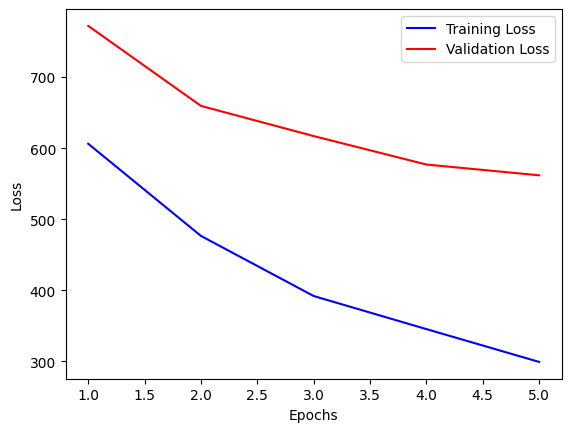

In [41]:
import matplotlib.pyplot as plt

# 모델 훈련
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# 손실 값 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 에포크 수
epochs = range(1, len(train_loss) + 1)

# 학습 곡선 그리기
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
# # 모델 저장
# model.save("../model/model_regression.h5")

## 검증 데이터의 손실값이 더 많은 것으로 보아 과적합 된것으로 판단됨

In [44]:
y_pred = model.predict(X_test)

# 예측 결과 출력
print("Predicted values:")
print(y_pred)

print("Actual values:")
print(y_test)

129/129 [==============================] - 1s 3ms/step
Predicted values:
[[ 0.9772195 ]
 [ 0.01840446]
 [-0.28934032]
 ...
 [-1.0597335 ]
 [-1.087333  ]
 [-0.01267651]]
Actual values:
[[ 0.98975194]
 [ 0.03000711]
 [-0.28513298]
 ...
 [-1.01568502]
 [-1.08730777]
 [ 0.05865621]]


In [45]:
# 원래 스케일로 되돌리기
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

import numpy as np
y_test_arr = np.array(y_test)
y_pred_arr = np.array(y_pred)

# 값들을 비교하면서 출력합니다.
for i in range(40):
    print("Actual:", y_test_arr[i], "Predicted:", y_pred_arr[i])

Actual: [145.] Predicted: [144.1251]
Actual: [78.] Predicted: [77.19002]
Actual: [56.] Predicted: [55.706284]
Actual: [108.] Predicted: [110.75055]
Actual: [220.] Predicted: [223.2061]
Actual: [43.] Predicted: [41.90083]
Actual: [100.] Predicted: [94.87819]
Actual: [156.] Predicted: [155.80768]
Actual: [10.] Predicted: [11.768646]
Actual: [11.] Predicted: [9.168419]
Actual: [195.] Predicted: [201.73128]
Actual: [153.] Predicted: [152.6237]
Actual: [48.] Predicted: [53.876297]
Actual: [15.] Predicted: [12.328072]
Actual: [59.] Predicted: [66.05953]
Actual: [145.] Predicted: [146.69623]
Actual: [21.] Predicted: [14.205795]
Actual: [42.] Predicted: [46.465908]
Actual: [6.] Predicted: [1.8004379]
Actual: [46.] Predicted: [47.037888]
Actual: [3.] Predicted: [9.803551]
Actual: [132.] Predicted: [126.90427]
Actual: [3.] Predicted: [0.7208175]
Actual: [14.] Predicted: [12.68869]
Actual: [370.] Predicted: [364.9838]
Actual: [0.] Predicted: [-2.5502472]
Actual: [140.] Predicted: [154.88722]
Actu

In [46]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.9326845729463988


batch 256
max_sequence_length = 150
R^2 Score: 0.9243755316599768

## 새로운 데이터로 확인

In [ ]:
# X = list(df["Subject"]+ ' ' +df['출고운반선']+  ' ' + df['key2'] + ' ' + df['Assembly'] + ' '  + df['견적화폐']  +  ' ' + df['발주처'])

In [58]:
strings = ["DEO-E-210512-01", "0","COOLER", "2N4727 INSTRUMNT PANEL GP", "KRW", "HAEIN Coporation_Cheonan"]
combined_string = " ".join(strings)
combined_string

'DEO-E-210512-01 0 COOLER 2N4727 INSTRUMNT PANEL GP KRW HAEIN Coporation_Cheonan'

In [59]:
combined_string = tokenizer.texts_to_sequences([combined_string])
# combined_string

In [60]:
combined_string

[[82, 17, 389, 7, 55, 103, 2126, 2127, 314, 11, 2, 8, 9, 10]]

In [61]:
padded_string = pad_sequences(combined_string, maxlen=100)

In [62]:
y_pred_test = model.predict(padded_string)

1/1 [==============================] - 0s 303ms/step


In [64]:
y_pred_test = scaler.inverse_transform(y_test)

In [65]:
y_pred_test

array([[10198.38745323],
       [ 5521.10254867],
       [ 3985.27765464],
       ...,
       [  424.95630938],
       [   75.9051971 ],
       [ 5660.72299359]])

In [66]:
import numpy as np
y_pred_test = np.array(y_pred_test)

In [67]:
y_pred_test

array([[10198.38745323],
       [ 5521.10254867],
       [ 3985.27765464],
       ...,
       [  424.95630938],
       [   75.9051971 ],
       [ 5660.72299359]])

In [97]:
strings = ["DEO-E-210512-01", "0", "COOLER", "2N4727 INSTRUMNT PANEL GP", "KRW", "HAEIN Coporation_Cheonan"]
combined_string = " ".join(strings)

# 문자열을 정수 시퀀스로 변환
combined_sequence = tokenizer.texts_to_sequences([combined_string])

# 시퀀스 패딩
combined_padded_sequence = pad_sequences(combined_sequence, maxlen=100)

# 예측
y_pred = model.predict(combined_padded_sequence)

1/1 [==============================] - 0s 53ms/step


In [98]:
y_pred_test = scaler.inverse_transform(y_pred)

In [99]:
y_pred_test[0][0]

221.60411

In [106]:
import tensorflow as tf

print(tf.__version__)

2.10.0


In [13]:
# y_test와 y_pred를 numpy 배열로 변환합니다.
# 정규화 하지 않은 데이터
y_test_arr = np.array(y_test)
y_pred_arr = np.array(y_pred)

# 값들을 비교하면서 출력합니다.
for i in range(50):
    print("Actual:", y_test_arr[i], "Predicted:", y_pred_arr[i])

Actual: [145.] Predicted: [148.77786]
Actual: [78.] Predicted: [77.41876]
Actual: [56.] Predicted: [58.280293]
Actual: [108.] Predicted: [105.628624]
Actual: [220.] Predicted: [222.80357]
Actual: [43.] Predicted: [45.524597]
Actual: [100.] Predicted: [92.795044]
Actual: [156.] Predicted: [153.02373]
Actual: [10.] Predicted: [14.695118]
Actual: [11.] Predicted: [13.332512]
Actual: [195.] Predicted: [186.98003]
Actual: [153.] Predicted: [148.2663]
Actual: [48.] Predicted: [22.044804]
Actual: [15.] Predicted: [16.580692]
Actual: [59.] Predicted: [46.892204]
Actual: [145.] Predicted: [142.83379]
Actual: [21.] Predicted: [24.070553]
Actual: [42.] Predicted: [46.928703]
Actual: [6.] Predicted: [5.759987]
Actual: [46.] Predicted: [41.933746]
Actual: [3.] Predicted: [7.6031494]
Actual: [132.] Predicted: [139.73044]
Actual: [3.] Predicted: [5.3579254]
Actual: [14.] Predicted: [15.386093]
Actual: [370.] Predicted: [357.49884]
Actual: [0.] Predicted: [1.1531525]
Actual: [140.] Predicted: [148.110

In [247]:
# y_test와 y_pred를 numpy 배열로 변환합니다.
# 정규화 한 데이터

# 원래 스케일로 되돌리기
# y_test = scaler.inverse_transform(y_test)
# y_pred = scaler.inverse_transform(y_pred)

# y_test_arr = np.array(y_test)
# y_pred_arr = np.array(y_pred)

# 값들을 비교하면서 출력합니다.
for i in range(40):
    print("Actual:", y_test_arr[i], "Predicted:", y_pred_arr[i])

Actual: [145.] Predicted: [137.254]
Actual: [78.] Predicted: [73.74152]
Actual: [56.] Predicted: [53.198986]
Actual: [108.] Predicted: [128.79097]
Actual: [220.] Predicted: [187.18962]
Actual: [43.] Predicted: [46.800457]
Actual: [100.] Predicted: [88.934784]
Actual: [156.] Predicted: [161.49066]
Actual: [10.] Predicted: [8.983459]
Actual: [11.] Predicted: [10.035362]
Actual: [195.] Predicted: [200.47772]
Actual: [153.] Predicted: [169.86134]
Actual: [48.] Predicted: [18.613747]
Actual: [15.] Predicted: [13.10841]
Actual: [59.] Predicted: [73.91463]
Actual: [145.] Predicted: [132.04257]
Actual: [21.] Predicted: [20.742588]
Actual: [42.] Predicted: [40.93881]
Actual: [6.] Predicted: [6.1796494]
Actual: [46.] Predicted: [58.963406]
Actual: [3.] Predicted: [6.081856]
Actual: [132.] Predicted: [123.98383]
Actual: [3.] Predicted: [-0.7919541]
Actual: [14.] Predicted: [12.979439]
Actual: [370.] Predicted: [347.8837]
Actual: [0.] Predicted: [14.553131]
Actual: [140.] Predicted: [154.98233]
Ac

In [253]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: -1.170233379217025


In [252]:
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

129/129 [==============================] - 1s 4ms/step - loss: 10423.9658
Mean Squared Error: 10423.9658203125
